# Binary Classification

Apply deep learning to another common task.

## Example - Binary Classification

In [ ]:
import pandas as pd
from IPython.display import display

ion = pd.read_csv('./ion.csv', index_col=0)
display(ion.head())

df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


1. Membaca Data:
  * Kode pd.read_csv('./ion.csv', index_col=0) digunakan untuk membaca data dari file CSV.
  * Data ini kemudian disimpan dalam bentuk DataFrame dengan nama ion.

2. Pemrosesan Data:
  * Salinan dari DataFrame ion dibuat dengan df = ion.copy().
  * Kolom ‘Class’ diubah menjadi nilai biner (0 untuk ‘good’ dan 1 untuk ‘bad’) menggunakan df['Class'] = df['Class'].map({'good': 0, 'bad': 1}).
  * Data dibagi menjadi data pelatihan (df_train) dan data validasi (df_valid) dengan perbandingan 70:30.

3. Normalisasi Data:
  * Nilai maksimum dan minimum dari setiap fitur dihitung menggunakan max_ dan min_.
  * Setiap nilai fitur dalam data pelatihan dan data validasi kemudian dinormalisasi ke dalam rentang [0, 1].
  * Fitur-fitur yang memiliki nilai kosong (NaN) dihapus menggunakan dropna(axis=1, inplace=True).

4. Pemisahan Fitur dan Target:
  * Fitur-fitur (kolom-kolom) data disimpan dalam X_train dan X_valid.
  * Target (kolom ‘Class’) disimpan dalam y_train dan y_valid.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[33]),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

1. Lapisan Input:
  * Lapisan pertama (Dense) memiliki 4 unit dengan fungsi aktivasi ReLU (Rectified Linear Unit).
  * Jumlah unit pada lapisan input sesuai dengan jumlah fitur (kolom) dalam data (33 fitur dalam kasus ini).

2. Lapisan Tersembunyi:
  * Lapisan kedua (Dense) ditambahkan dengan 4 unit dan fungsi aktivasi ReLU.
  * Lapisan ini bertindak sebagai lapisan tersembunyi yang memproses informasi antara input dan output.

3. Lapisan Output:
  * Lapisan ketiga (Dense) memiliki 1 unit dengan fungsi aktivasi sigmoid.
  * Fungsi sigmoid menghasilkan output antara 0 dan 1, yang cocok untuk tugas klasifikasi biner (misalnya, ‘good’ atau ‘bad’).


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

1. Optimizer:
  * Optimizer yang digunakan adalah 'adam'. Adam adalah metode optimisasi yang populer dan efisien untuk melatih model neural network.
  * Optimizer ini menggabungkan metode dari algoritma gradient descent dan metode adaptif lainnya.

2. Loss Function:
  * Fungsi loss yang dipilih yaitu 'binary_crossentropy'. Fungsi ini cocok untuk tugas klasifikasi biner.
  * Fungsi ini mengukur perbedaan antara nilai prediksi dan nilai target (0 atau 1) pada tugas klasifikasi biner.

3. Metrics:
  * Metrik 'binary_accuracy' dipantau selama pelatihan.
  * Metrik ini mengukur akurasi model dalam memprediksi kelas biner.


In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

1. Early Stopping Callback:
  * Pada baris pertama, objek early_stopping dibuat menggunakan kelas keras.callbacks.EarlyStopping.
  * Callback ini digunakan selama pelatihan model untuk menghentikan pelatihan lebih awal jika tidak ada peningkatan dalam metrik yang diamati (misalnya, akurasi validasi).
  * Parameter yang diatur:
  ** patience: Jumlah epoch yang akan dijalankan tanpa peningkatan sebelum pelatihan dihentikan.
  ** min_delta: Perubahan minimum yang dianggap sebagai peningkatan.
  ** restore_best_weights: Jika diatur ke True, bobot model akan dikembalikan ke bobot terbaik yang ditemukan selama pelatihan.

2. Pelatihan Model:
  * Pada baris selanjutnya, model dilatih menggunakan metode .fit().
  * Parameter yang diatur:
  ** X_train dan y_train: Data pelatihan (fitur dan label).
  ** validation_data: Data validasi (fitur dan label) yang digunakan selama pelatihan.
  ** batch_size: Jumlah sampel yang diproses dalam setiap iterasi pelatihan.
  ** epochs: Jumlah epoch (iterasi) pelatihan.
  ** callbacks: Daftar callback yang akan digunakan selama pelatihan (termasuk early_stopping).
  ** verbose: Tingkat kebisingan output selama pelatihan (0 untuk menyembunyikan output).


Best Validation Loss: 0.2762
Best Validation Accuracy: 0.8667


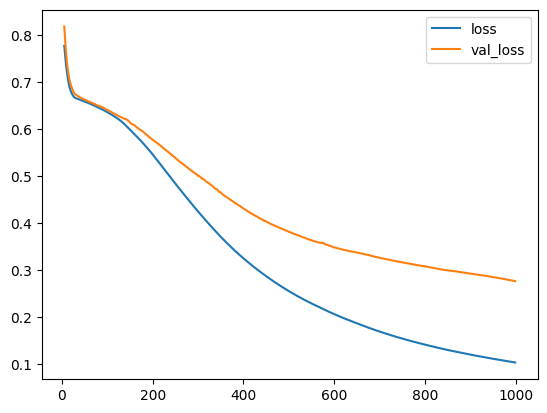

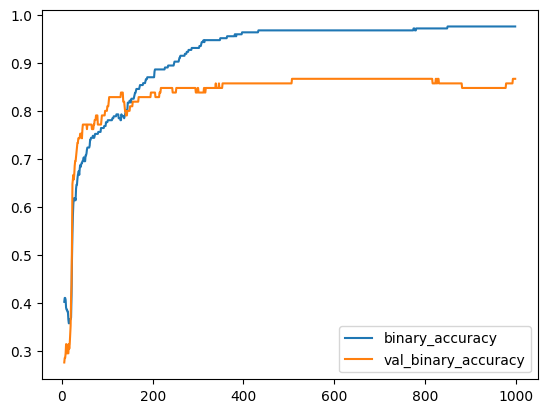

In [ ]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))

1. DataFrame dari History Pelatihan:
  * Baris pertama membuat DataFrame history_df dari hasil pelatihan model. Ini akan berisi metrik pelatihan seperti loss dan akurasi.
  * Data ini berasal dari objek history yang dihasilkan oleh metode .fit().

2. Plot Loss dan Akurasi:
  * Baris kedua dan ketiga mengambil data dari history_df mulai dari epoch ke-5.
  * Plot pertama menampilkan loss pelatihan (loss) dan loss validasi (val_loss) seiring dengan jumlah epoch.
  * Plot kedua menampilkan akurasi biner pelatihan (binary_accuracy) dan akurasi biner validasi (val_binary_accuracy).

3. Informasi Terbaik:
  * Baris terakhir mencetak informasi terbaik dari hasil validasi:
  ** Best Validation Loss: Menunjukkan nilai loss terendah yang ditemukan selama validasi.
  ** Best Validation Accuracy: Menunjukkan akurasi validasi tertinggi yang ditemukan selama validasi.
